### EDA with Visuals
#### a. Visualize top 20 most played music artists & podcast shows

C:\Users\Administrator\AppData\Local\Temp\ipykernel_27108\4003615612.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y = top_artists.index, palette='Blues_r')


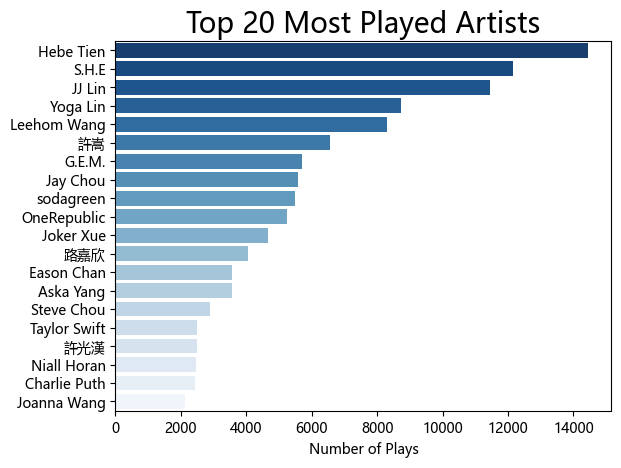

C:\Users\Administrator\AppData\Local\Temp\ipykernel_27108\4003615612.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_show.values, y = top_show.index, palette='Blues_r')


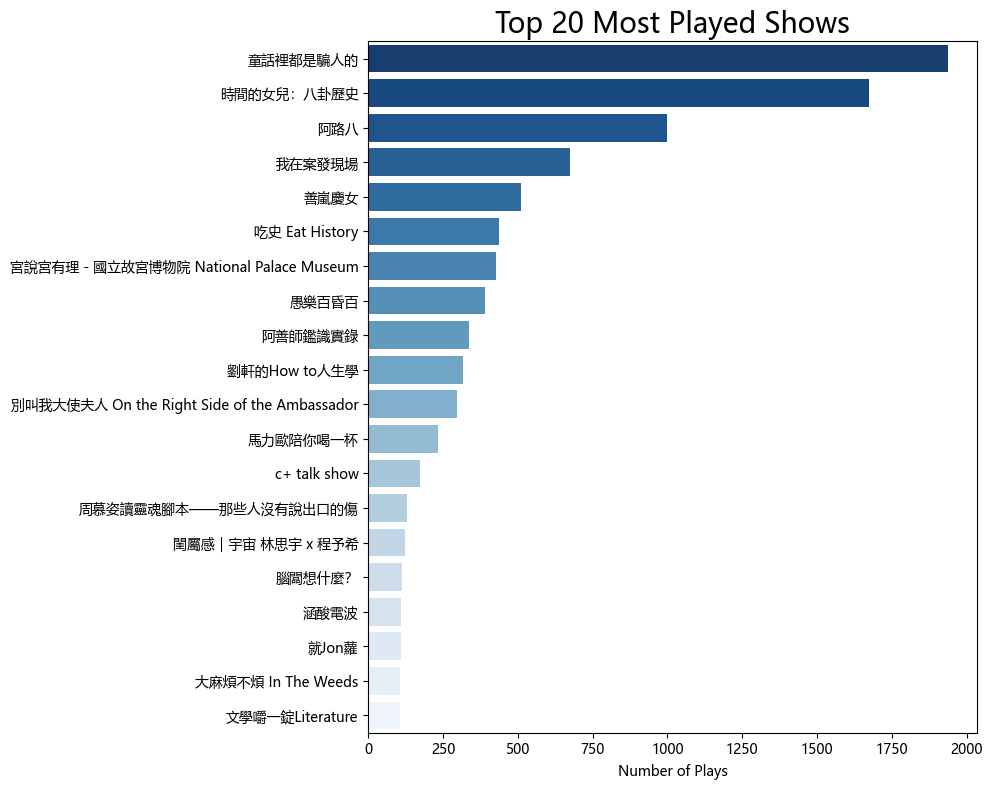

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import pandas as pd

# load data
music_tracks_df = pd.read_csv('../Cleaned_Data/Music_Streaming_History.csv')
podcast_episodes_df = pd.read_csv('../Cleaned_Data/Podcast_Streaming_History.csv')


# set font to Microsoft YaHei to show Chinese characters
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

# visualize top 20 most played artists
top_artists = music_tracks_df['artist_name'].value_counts().head(20)
sns.barplot(x=top_artists.values, y = top_artists.index, palette='Blues_r')
plt.title('Top 20 Most Played Artists', fontsize = 20)
plt.xlabel('Number of Plays')
plt.ylabel(None)
plt.show()

# visualize top 20 most played shows (podcast)
top_show = podcast_episodes_df['show_name'].value_counts().head(20)
# adjust width and height
plt.figure(figsize=(10, 8))  
sns.barplot(x=top_show.values, y = top_show.index, palette='Blues_r')
plt.title('Top 20 Most Played Shows', fontsize = 20)
plt.xlabel('Number of Plays')
plt.ylabel(None)
# ensure everything fits properly
plt.tight_layout()
plt.show()

#### b. Visualize Listening Trends Over Time

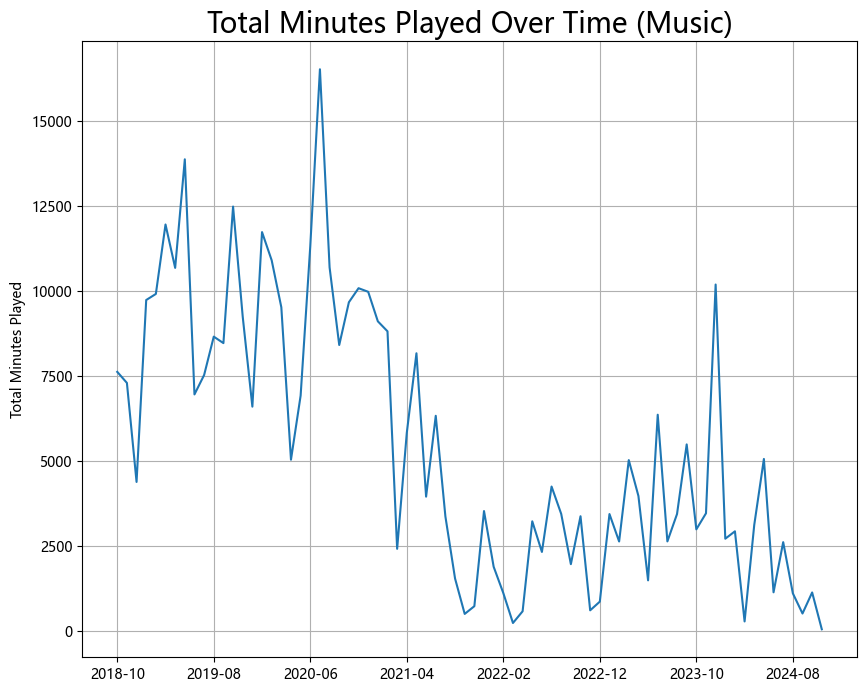

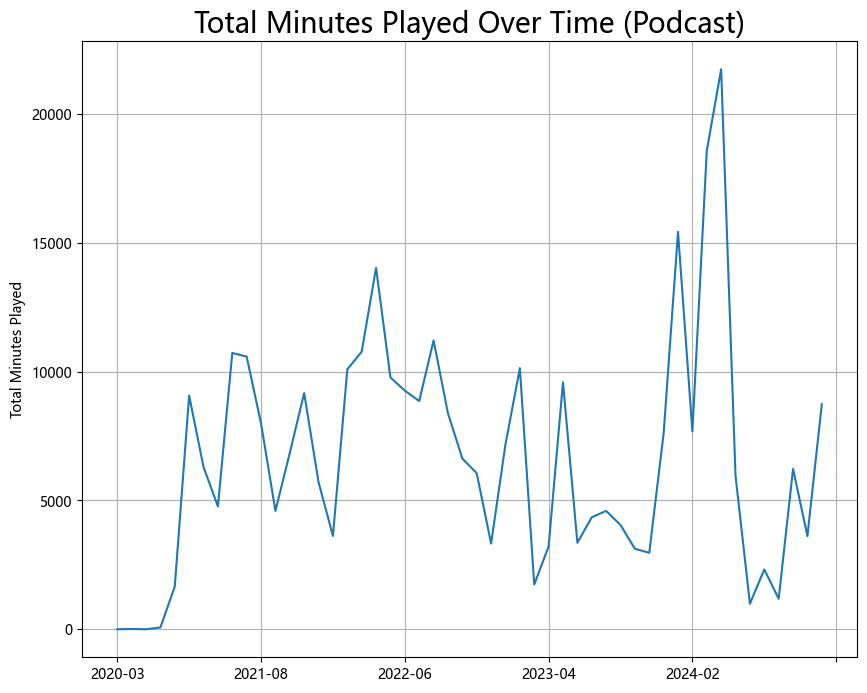

In [2]:
# visualize music listending trends over time
# group by month_year
music_month_year_trend = music_tracks_df.groupby('month_year').sum()['minutes_played']

# plot
music_month_year_trend.plot(figsize=(10, 8))
plt.title('Total Minutes Played Over Time (Music)', fontsize = 20)
plt.xlabel(None)
plt.ylabel('Total Minutes Played')
plt.grid(True)
plt.show()

# visualize podcast listending trends over time
# group by month_year
podcast_month_year_trend = podcast_episodes_df.groupby('month_year').sum()['minutes_played']

# plot
podcast_month_year_trend.plot(figsize=(10, 8))
plt.title('Total Minutes Played Over Time (Podcast)', fontsize = 20)
plt.xlabel(None)
plt.ylabel('Total Minutes Played')
plt.grid(True)
plt.show()